### 머신러닝 분류
#### [1] 지도학습(Supervised Learning) : 답이 주어진 상태에서 학습
* 회귀(Regression)
* 분류(Classification)

#### [2] 비지도학습(Unsupervised Learning) : 답을 모르고 학습
* 군집화(Clustering)
* 차원 축소(Dimension Reduction) : PCA(주성분 분석, Pricipal Component Analysis)

#### [3] 강화 학습(Reinforcement Learning) : 답을 모르고 있는 상태에서 답을 알아가는 강한 인공지능(자아를 갖음, 인간수준)
게임, 알파고(DQN)

### 퍼셉트론과 XOR Problem

In [1]:
def AND(x1,x2):
    w1,w2,theta = 0.5,0.5,0.7
    tmp = w1*x1 + w2*x2
    print(tmp)
    if tmp<=theta : # 임계값
        return 0
    elif tmp > theta: 
        return 1

print(AND(0,0))
print(AND(0,1))
print(AND(1,0))
print(AND(1,1))

0.0
0
0.5
0
0.5
0
1.0
1


In [2]:
def NAND(x1,x2):
    w1,w2,theta = 0.5,0.5,0.5
    tmp = w1*x1 + w2*x2
    if tmp<=theta : # 임계값
        return 1
    elif tmp > theta: 
        return 0

print(NAND(0,0))
print(NAND(0,1))
print(NAND(1,0))
print(NAND(1,1))

1
1
1
0


In [5]:
def OR(x1,x2):
    w1,w2,theta = 0.5,0.5,0.4
    tmp = w1*x1 + w2*x2
    if tmp <= theta :  # 임계값
        return 0
    elif tmp > theta:
        return 1

print(OR(0,0))    
print(OR(0,1))
print(OR(1,0))
print(OR(1,1))

0
1
1
1


In [3]:
# 단층 퍼셉트론의 한계
# XOR Problem : 아무리 학습시켜도 weight을 구할 수가 없음
# def XOR(x1,x2):
#     w1,w2,theta = 0.5,0.5,0.4
#     tmp = w1*x1 + w2*x2
#     print(tmp)
#     if tmp<=theta : # 임계값
#         return 0
#     elif tmp > theta: 
#         return 1

# print(XOR(0,0))
# print(XOR(0,1))
# print(XOR(1,0))
# print(XOR(1,1))

### Backpropagation : 1986년 제프리 힌튼(Geoffrey Hinton)
샘플에 대한 신경망의 오차를 다시 출력층에서부터 입력층으로 거꾸로 전파시켜 각 층의 가중치(weight)를 계산하는 방법. 이를 통해 weight와 bias를 알맞게 학습할 수 있다

### 다층퍼셉트론(MLP)으로 XOR Problem 해결

In [6]:
# XOR Problem : 서롣 다른 weight을 갖는 다층신경망을 사용하여 해결
def XOR(x1,x2):
    s1 = NAND(x1,x2)
    s2 = OR(x1,x2)
    y = AND(s1,s2)
    return y

print(XOR(0,0))
print(XOR(0,1))
print(XOR(1,0))
print(XOR(1,1))

0.5
0
1.0
1
1.0
1
0.5
0


### 회귀(Regression)모델
#### [1] 선형회귀(Linear Regression) :  1차 함수, 직선의 방정식

#### [2] 가중치(Weight) : 입력변수가 출력에 영향을 미치는 정도를 설정, 기울기 값, 회귀 계수

#### [3] 편향(Bias) : 기본 출력 값이 활성화 되는 정도를 설정, y절편, 회귀계수

#### [4] 비용함수(Cost Function) : 2차 함수, 포물선의 방정식, (예측값-실제값)^2
- cost(비용) = 오차 = 에러 = 손실(loss)
- cost(W, b) = (H(x) - y)^2

#### [5] 예측(가설,Hypothesis)함수 : predict, H(x) : 예측값, y값 : 답, 결정값, target, label, x: 입력, 피쳐(feature)
- H(x) = W*X + b

#### [6] 경사 하강법(Gradient Descent Algorithm)
#### : 비용(cost) 이 가장 작은 Weight(가중치) 값을 구하는 알고리즘
 

w:-1,cost: 18.666666666666668
w:0,cost: 4.666666666666667
w:1,cost: 0.0
w:2,cost: 4.666666666666667
w:3,cost: 18.666666666666668


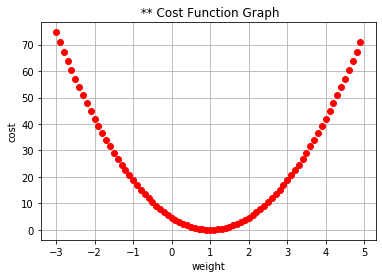

In [8]:
# 비용 함수의 구현
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def cost(x,y,w) : 
    c = 0
    for k in range(len(x)):
        hx = w * x[k]         # 예측 함수(방정식)
        loss = (hx - y[k])**2 # (예측값 - 실제값)^2
        c += loss
    return c/len(x)          # 평균 제곱 오차

x = [1,2,3]
y = [1,2,3]

print('w:-1,cost:', cost(x,y,-1))  # hx = [-1,-2,-3], cost: 18.666666666666668
print('w:0,cost:', cost(x,y,0))    # hx = [0,0,0]
print('w:1,cost:', cost(x,y,1))    # hx = [1,2,3]  , w=1, cost=0.0, 최저점
print('w:2,cost:', cost(x,y,2))    # hx = [2,4,6]
print('w:3,cost:', cost(x,y,3))    # hx = [1,2,3],  cost: 18.666666666666668

# 비용함수의 시각화 : x축은 weight, y축은 cost로 하는 2차 함수, 포물선의 방정식 
for k in range(-30,50):
    w = k/10
    c = cost(x,y,w)
    plt.plot(w,c,'ro')  # 'r':red, 'o': 점으로 출력
    
plt.title(' ** Cost Function Graph')
plt.xlabel('weight')
plt.ylabel('cost')
plt.grid()
plt.show()

### 미분 : 순간 변화량, 기울기, x축으로 1만큼 움직였을 때 y측으로 움직인 거리

#### 함수의 미분 공식 정리 : f(x) = x^n ===> f '(x) = n*x^(n-1)

In [13]:
# 경사 하강법 알고리즘 함수 구현, 미분 적용
def gradient_descent(x,y,w):
    c=0
    for k in range(len(x)):
        hx = w*x[k]
        loss = (hx-y[k])*x[k]     # 곱하기2를 생략한 비용함수의 미분
        c += loss
        # 비용함수의 미분 : cost(w) = (w*x[k] - y[k])^2 의 미분
        # cost(w) = w^2 * x[k]^2 - 2*w*x[k]*y[k] + y[k]^2
        # cost'(w) = 2*w*x[k]^2 - 2*x[k]*y[k] = 2*x[k]*(w*x[k] - y[k])
        # =  2*x[k]*(hx - y[k])
    return c/len(x)

# x=[1,2,3]
# y=[1,2,3,4,5]

# 학습 시작(train,fit) 시작
print('------------start learning!!')
w, old = 10,100
for k in range(1000):
    c=cost(x,y,w)
    grad = gradient_descent(x,y,w)
    w -= 0.1*grad   # 0.1 : 학습율(learning rate), 하이퍼 파라메터, 가중치의 업데이트실행
    print('[%03d]'%k,'cost:',c,'old:',old,'weight:',w)
#   if c == old:  # cost의 변화가 없을 때
    if c >=old and abs(c-old) < 1.0e-15:  # cost가 1.0e-15값 보다도 더 줄지 않을 때
        break
    old = c
    
print('-------------end learning!!')


------------start learning!!
[000] cost: 378.0 old: 100 weight: 5.8
[001] cost: 107.51999999999998 old: 378.0 weight: 3.56
[002] cost: 30.583466666666666 old: 107.51999999999998 weight: 2.365333333333333
[003] cost: 8.69929718518518 old: 30.583466666666666 weight: 1.7281777777777778
[004] cost: 2.47446675489712 old: 8.69929718518518 weight: 1.3883614814814815
[005] cost: 0.7038483213929583 old: 2.47446675489712 weight: 1.2071261234567903
[006] cost: 0.2002057447517751 old: 0.7038483213929583 weight: 1.1104672658436214
[007] cost: 0.05694741184050483 old: 0.2002057447517751 weight: 1.0589158751165981
[008] cost: 0.016198374923521403 old: 0.05694741184050483 weight: 1.0314218000621858
[009] cost: 0.004607537756023892 old: 0.016198374923521403 weight: 1.0167582933664991
[010] cost: 0.0013105885172690224 old: 0.004607537756023892 weight: 1.008937756462133
[011] cost: 0.0003727896226898598 old: 0.0013105885172690224 weight: 1.004766803446471
[012] cost: 0.0001060379371206724 old: 0.00037278

In [23]:
# linear Regression
# 알고리즘 구현 : 비용함수와 경사 하강법 알고리즘 함수 구현

# (1) 비용함수 구현
def cost(x,y,w) : 
    c = 0
    for k in range(len(x)):
        hx = w * x[k]         # 예측 함수(방정식)
        loss = (hx - y[k])**2 # (예측값 - 실제값)^2
        c += loss
    return c/len(x)          # 평균 제곱 오차

# (2) 경사 하강법 알고리즘 함수 구현
def gradient_descent(x,y,w):
    c=0
    for k in range(len(x)):
        hx = w*x[k]
        loss = (hx-y[k])*x[k]     # 곱하기 2를 생략한 비용함수의 미분
        c += loss
        # 비용함수의 w에 대한 미분 : cost(w) = (w*x[k] - y[k])^2 의 미분
        # cost(w) = w^2 * x[k]^2 - 2*w*x[k]*y[k] + y[k]^2
        # cost'(w) = 2*w*x[k]^2 - 2*x[k]*y[k] = 2*x[k]*(w*x[k] - y[k])
        # =  2*x[k]*(hx - y[k])
    return c/len(x)

# (3) 학습(fit) 함수 구현
def fit(x,y):
    print('------------start learning!!')
    w, old = 10,100
    for k in range(1000):
        c=cost(x,y,w)
        grad = gradient_descent(x,y,w)
        w -= 0.1*grad   # 0.1 : 학습율(learning rate), 하이퍼 파라메터, 가중치의 업데이트실행
        print('[%03d]'%k,'cost:',c,'old:',old,'weight:',w)
    #   if c == old:  # cost의 변화가 없을 때
        if c >=old and abs(c-old) < 1.0e-15:  # cost가 1.0e-15값 보다도 더 줄지 않을 때
            break
        old = c
    print('-------------end learning!!')
    return w
    
# (4) 예측(predict) 함수 구현
def predict(x,w):
    hx = w*np.array(x)
    return list(hx)

# (5) 정확도(평가지표) 측정 함수 구현 : 정확도 검증(Validation)
# <1> 분류(classification) 일 때 : 정확도(%)
def get_accuaracy(x_test,y_test,w):
    y_pred = predict(x_test,w)
    print(y_pred)
    correct = 0
    for k, _ in enumerate(y_test):
        if y_test[k] == y_pred[k]:  # 실제값과 예측값이 같으면 correct를 1증가
            correct +=1
    accuracy = round(correct/len(y_test),2)  # 맞은 갯수/전체 갯수  # 2자리로 반올림
    return accuracy

# <2> 회귀 모델(Linear Regression) 일 때 : RMSE(Root Mean Squared Error, 평균 제곱근 오차)
def get_rmse(x_test,y_test,w):
    y_pred = predict(x_test,w)
    print(y_pred)
    squared_error = 0
    for k,_ in enumerate(y_test):
        squared_error += (y_pred[k] - y_test[k])**2  # 오차의 제곱을 합한다.
    mse = squared_error/len(y_test)   # 오차의 제곱의 평균, 평균 제곱 오차
    rmse = np.sqrt(mse)               # 제곱근(Root), 평균 제곱근 오차
    return rmse            

In [25]:
# 머신 러닝 사용자가 구현할 부분 : 모델 구현

# (1) fit() 함수를 호출하여 학습
x_train = [1,2,3,4,5]
y_train = [2,4,6,8,10]

w = fit(x_train, y_train)
print('weight:',w)  # w:2.0 , cost:0.0

# (2) predict() 함수를 호출하여 예측
x_pred = [6,7,8,9,10]  # x 값만 사용
y_pred = predict(x_pred,w)
print('y_pred',y_pred)   # [12.0, 14.0, 16.0, 18.0, 20.0]

# (3) 정확도 측정
# 분류 모델인 경우
x_test = [10,20,30]
# y_test = [20,40,60]
y_test = [20,40,70]

accuracy = get_accuaracy(x_test,y_test,w)
print('Accuracy:',accuracy)  # 0.67

# 회귀 모델인 경우
x_test = [10,20,30]
# y_test = [20,40,60]
y_test = [20,40,70]

rmse = get_rmse(x_test,y_test,w)
print('RMSE:',rmse)   # RMSE: 5.773502691896258

------------start learning!!
[000] cost: 704.0 old: 100 weight: 1.1999999999999993
[001] cost: 7.040000000000012 old: 704.0 weight: 2.08
[002] cost: 0.07040000000000013 old: 7.040000000000012 weight: 1.992
[003] cost: 0.0007039999999999871 old: 0.07040000000000013 weight: 2.0008
[004] cost: 7.03999999999845e-06 old: 0.0007039999999999871 weight: 1.99992
[005] cost: 7.040000000016923e-08 old: 7.03999999999845e-06 weight: 2.0000080000000002
[006] cost: 7.040000000546988e-10 old: 7.040000000016923e-08 weight: 1.9999992
[007] cost: 7.040000000689097e-12 old: 7.040000000546988e-10 weight: 2.00000008
[008] cost: 7.039999989746739e-14 old: 7.040000000689097e-12 weight: 1.999999992
[009] cost: 7.039999978378055e-16 old: 7.039999989746739e-14 weight: 2.0000000008
[010] cost: 7.040001164984472e-18 old: 7.039999978378055e-16 weight: 1.99999999992
[011] cost: 7.040001164984472e-20 old: 7.040001164984472e-18 weight: 2.000000000008
[012] cost: 7.039830636607046e-22 old: 7.040001164984472e-20 weight:

 ### class를 사용한 Linear Regression 알고리즘 구현

In [26]:
# Linear Regression
# 알고리즘 구현 : 비용함수와 경사 하강법 알고리즘 함수 구현

class LinearRegression:
    def __init__(self): # 생성자
        self.w = 0
        print('LinearRegression 생성자')
        
    # (1) 비용함수 구현
    def cost(self,x,y) :
        c = 0
        for k in range(len(x)):
            hx = self.w * x[k]     # 예측 함수(방정식)
            loss = (hx - y[k])**2  # (예측값 - 실제값)^2
            c += loss
        return c/len(x)            #  평균 제곱 오차

    # (2) 경사 하강법 알고리즘 함수 구현
    def gradient_descent(self,x,y):
        c = 0
        for k in range(len(x)):
            hx = self.w*x[k] 
            loss = (hx - y[k])*x[k]     # 곱하기 2를 생략한 비용함수의 미분
            c += loss
            # 비용함수의 미분 : cost(w) = (w*x[k] - y[k])^2 의 미분
            # cost(w) = w^2 * x[k]^2 - 2*w*x[k]*y[k] + y[k]^2
            # cost'(w) = 2*w*x[k]^2 - 2*x[k]*y[k] = 2*x[k]*(w*x[k] - y[k])
            # =  2*x[k]*(hx - y[k])
        return c/len(x)

    # (3) 학습(fit) 함수 구현
    def fit(self,x,y):
        print('----------- start learning!!')
        self.w , old = 10, 100
        for k in range(1000):
            c = self.cost(x,y)
            grad = self.gradient_descent(x,y)
            self.w -= 0.1*grad  # 0.1:학습율(learning rate),하이퍼 파라메터,가중치의 업데이트실행
            print('[%03d]'%k,'cost:',c,'old:',old,'weight:',self.w)
        #   if c == old:  # cost의 변화가 없을 때
            if c >= old and abs(c - old) < 1.0e-15: # cost가 1.0e-15값 보다도 더 줄지 않을 때
                break
            old = c
        print('----------- end learning!!')  
#         return self.w

    # (4) 예측(predict) 함수 구현
    def predict(self,x):
        hx = self.w*np.array(x)
        return list(hx)

    # (5) 정확도(평가지표) 측정 함수 구현 :  정확도 검증(Valiation)  
    # <1> 분류(classification) 일 때 : 정확도(%)
    def get_accuaracy(self,x_test,y_test):
        y_pred = self.predict(x_test)
        print(y_pred)
        correct = 0
        for k,_ in enumerate(y_test) :
            if y_test[k] == y_pred[k] :  # 실제값과 예측값이 같으면 correct를 1증가
                correct += 1
        accuracy = round(correct/len(y_test),2)  # 맞은 갯수/전체 갯수
        return accuracy                

    # <2> 회귀(Linear Regression) 일 때 : RMSE(Root Mean Squared Error,평균 제곱근 오차)
    def get_rmse(self,x_test,y_test):
        y_pred = self.predict(x_test)
        print(y_pred)
        squared_error = 0
        for k,_ in enumerate(y_test):
            squared_error += (y_pred[k] - y_test[k])**2  # 오차의 제곱을 합한다
        mse = squared_error/len(y_test)   # 오차의 제곱의 평균, 평균 제곱 오차
        rmse = np.sqrt(mse)               # 제곱근(Root), 평균 제곱근 오차
        return rmse

In [25]:
# 머신 러닝 사용자가 구현할 부분 : 모델 구현, class의 인스턴스를 생성하여 사용

# (1) fit() 함수를 호출하여 학습
x_train = [1,2,3,4,5]
y_train = [2,4,6,8,10]

w = fit(x_train, y_train)
print('weight:',w)  # w:2.0 , cost:0.0

# (2) predict() 함수를 호출하여 예측
x_pred = [6,7,8,9,10]  # x 값만 사용
y_pred = predict(x_pred,w)
print('y_pred',y_pred)   # [12.0, 14.0, 16.0, 18.0, 20.0]

# (3) 정확도 측정
# 분류 모델인 경우
x_test = [10,20,30]
# y_test = [20,40,60]
y_test = [20,40,70]

accuracy = get_accuaracy(x_test,y_test,w)
print('Accuracy:',accuracy)  # 0.67

# 회귀 모델인 경우
x_test = [10,20,30]
# y_test = [20,40,60]
y_test = [20,40,70]

rmse = get_rmse(x_test,y_test,w)
print('RMSE:',rmse)   # RMSE: 5.773502691896258

------------start learning!!
[000] cost: 704.0 old: 100 weight: 1.1999999999999993
[001] cost: 7.040000000000012 old: 704.0 weight: 2.08
[002] cost: 0.07040000000000013 old: 7.040000000000012 weight: 1.992
[003] cost: 0.0007039999999999871 old: 0.07040000000000013 weight: 2.0008
[004] cost: 7.03999999999845e-06 old: 0.0007039999999999871 weight: 1.99992
[005] cost: 7.040000000016923e-08 old: 7.03999999999845e-06 weight: 2.0000080000000002
[006] cost: 7.040000000546988e-10 old: 7.040000000016923e-08 weight: 1.9999992
[007] cost: 7.040000000689097e-12 old: 7.040000000546988e-10 weight: 2.00000008
[008] cost: 7.039999989746739e-14 old: 7.040000000689097e-12 weight: 1.999999992
[009] cost: 7.039999978378055e-16 old: 7.039999989746739e-14 weight: 2.0000000008
[010] cost: 7.040001164984472e-18 old: 7.039999978378055e-16 weight: 1.99999999992
[011] cost: 7.040001164984472e-20 old: 7.040001164984472e-18 weight: 2.000000000008
[012] cost: 7.039830636607046e-22 old: 7.040001164984472e-20 weight:

In [27]:
# 머신 러닝 사용자가 구현할 부분 : 모델 구현 , class의 인스턴스를 생성하여 사용

# (1) fit() 함수를 호출하여 학습 수행
x_train = [1,2,3,4,5]
y_train = [2,4,6,8,10]

lr = LinearRegression()  # class의 인스턴스 객체를 생성
lr.fit(x_train,y_train)  # 인스턴스 메서드를 호출
print('weight:',lr.w)    # w:2.0 , cost:0.0

# (2) predict() 함수를 호출하여 예측
x_pred = [6,7,8,9,10]   # x 값만 사용
y_pred = lr.predict(x_pred)  # 인스턴스 메서드를 호출
print('y_pred:',y_pred)  # [12.0, 14.0, 16.0, 18.0, 20.0]

# (3) 정확도 측정
# 분류 모델인 경우
x_test = [10,20,30]
# y_test = [20,40,60]
y_test = [20,40,70]

accuracy = lr.get_accuaracy(x_test,y_test)  # 인스턴스 메서드를 호출
print('Accuarcy:',accuracy)  # 0.67  , 절대 지표

# 회귀 모델인 경우
x_test = [10,20,30]
# y_test = [20,40,60]
y_test = [20,40,70]

rmse = lr.get_rmse(x_test,y_test)  # 인스턴스 메서드를 호출
print('RMSE:',rmse) # RMSE: 5.773502691896258 , 상대 지표

LinearRegression 생성자
----------- start learning!!
[000] cost: 704.0 old: 100 weight: 1.1999999999999993
[001] cost: 7.040000000000012 old: 704.0 weight: 2.08
[002] cost: 0.07040000000000013 old: 7.040000000000012 weight: 1.992
[003] cost: 0.0007039999999999871 old: 0.07040000000000013 weight: 2.0008
[004] cost: 7.03999999999845e-06 old: 0.0007039999999999871 weight: 1.99992
[005] cost: 7.040000000016923e-08 old: 7.03999999999845e-06 weight: 2.0000080000000002
[006] cost: 7.040000000546988e-10 old: 7.040000000016923e-08 weight: 1.9999992
[007] cost: 7.040000000689097e-12 old: 7.040000000546988e-10 weight: 2.00000008
[008] cost: 7.039999989746739e-14 old: 7.040000000689097e-12 weight: 1.999999992
[009] cost: 7.039999978378055e-16 old: 7.039999989746739e-14 weight: 2.0000000008
[010] cost: 7.040001164984472e-18 old: 7.039999978378055e-16 weight: 1.99999999992
[011] cost: 7.040001164984472e-20 old: 7.040001164984472e-18 weight: 2.000000000008
[012] cost: 7.039830636607046e-22 old: 7.040001